In [122]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [70]:
train_df = pd.read_csv('House_prices_Kagle/train.csv', index_col='Id')
test_df = pd.read_csv('House_prices_Kagle/test.csv', index_col='Id')

In [65]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [66]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [106]:
train_df.dtypes[train_df.dtypes != 'object']


MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [206]:
# Create list to drop
del(to_drop)
to_drop = []

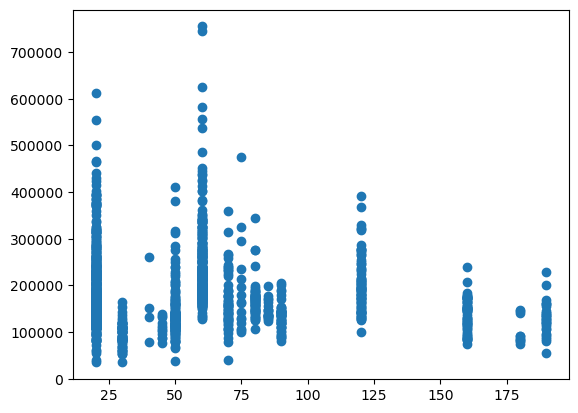

In [109]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)

In [120]:
np.sort(train_df['MSSubClass'].unique())

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
       180, 190], dtype=int64)

In [154]:
train_df.query('MSSubClass == 40')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,152000
590,40,RM,50.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,600,8,2008,WD,Normal,79500
874,40,RL,60.0,12144,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Othr,0,9,2009,WD,Normal,133000
1271,40,RL,NaN,23595,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,260000


In [156]:
stats.zscore(train_df['MSSubClass'].dropna()).sort_values().tail(10)
#nothing to drop so far, maybe later

Id
1031    3.147673
1417    3.147673
970     3.147673
536     3.147673
336     3.147673
521     3.147673
1267    3.147673
49      3.147673
1063    3.147673
862     3.147673
Name: MSSubClass, dtype: float64

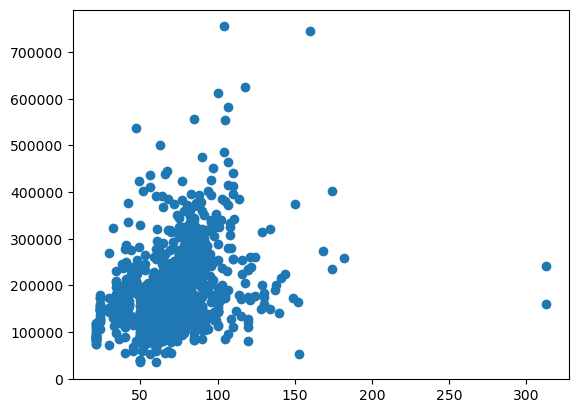

In [82]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

In [181]:
train_df.query('LotFrontage > 155').index

Index([198, 232, 935, 1108, 1128, 1183, 1299], dtype='int64', name='Id')

In [175]:
stats.zscore(train_df['LotFrontage'].dropna()).sort_values().tail(7)

Id
1183     3.705515
1108     4.035077
232      4.282249
198      4.282249
1128     4.611811
935     10.008389
1299    10.008389
Name: LotFrontage, dtype: float64

In [207]:
for x in train_df.query('LotFrontage > 155').index:
    to_drop.append(x)
to_drop

[198, 232, 935, 1108, 1128, 1183, 1299]

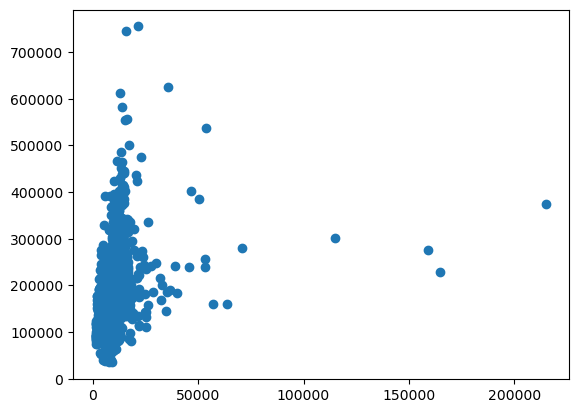

In [88]:
plt.scatter(x='LotArea', y='SalePrice', data=train_df)

In [212]:
train_df.query('LotArea > 50000').index
# a lot to drop

Index([54, 250, 314, 336, 385, 452, 458, 707, 770, 1299, 1397], dtype='int64', name='Id')

In [214]:
stats.zscore(train_df['LotArea']).sort_values().tail(7).index
# Huge z-score, lets drop up to 1396 so 7 rows


Index([1397, 1299, 452, 707, 250, 336, 314], dtype='int64', name='Id')

In [215]:
for x in stats.zscore(train_df['LotArea']).sort_values().tail(7).index:
    to_drop.append(x)
to_drop

[198, 232, 935, 1108, 1128, 1183, 1299, 1397, 1299, 452, 707, 250, 336, 314]

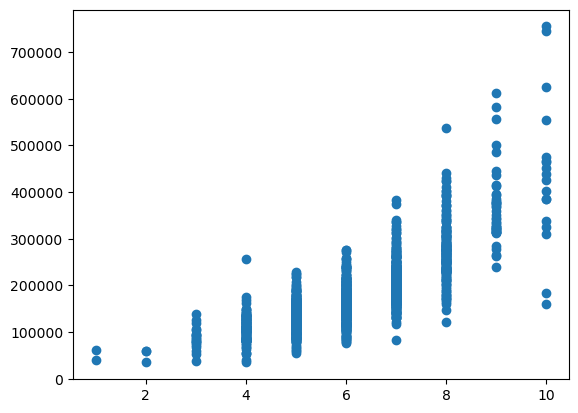

In [91]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)

In [218]:
train_df.query('OverallQual == 10 & SalePrice < 250000').index
#To drop 524, 1299
for x in train_df.query('OverallQual == 10 & SalePrice < 250000').index:
    to_drop.append(x)

In [225]:
train_df.query('OverallQual == 4 & SalePrice > 200000')
# to drop 458
to_drop.append('458')

In [234]:
train_df.query('OverallQual == 8 & SalePrice > 500000').index

Index([770], dtype='int64', name='Id')

In [235]:
to_drop.append('770')

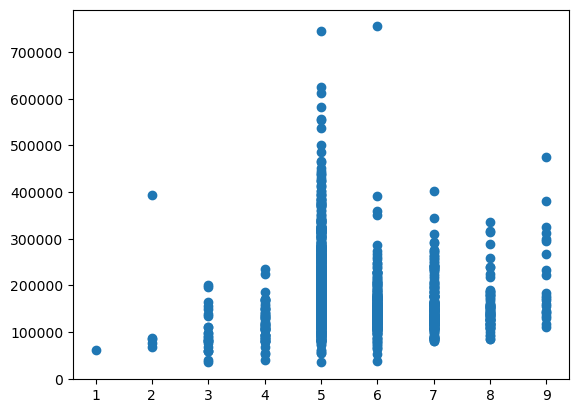

In [99]:
plt.scatter(x='OverallCond', y='SalePrice', data=train_df)

In [239]:
drop_data = train_df.query('OverallCond == 2 & SalePrice > 350000 | OverallCond == 5 & SalePrice > 700000 | OverallCond == 6 & SalePrice > 700000 | OverallCond == 1 | OverallCond == 9 & SalePrice > 400000').index

In [241]:
for x in drop_data:
    to_drop.append(x)
del drop_data

NameError: name 'drop_data' is not defined

In [242]:
to_drop

[198,
 232,
 935,
 1108,
 1128,
 1183,
 1299,
 1397,
 1299,
 452,
 707,
 250,
 336,
 314,
 524,
 1299,
 '458',
 '770',
 186,
 376,
 379,
 692,
 1183]

In [245]:
to_drop[-6] = int(to_drop[-6])

In [246]:
to_drop[-7] = int(to_drop[-7])

In [248]:
to_drop

[198,
 232,
 935,
 1108,
 1128,
 1183,
 1299,
 1397,
 1299,
 452,
 707,
 250,
 336,
 314,
 524,
 1299,
 458,
 770,
 186,
 376,
 379,
 692,
 1183]

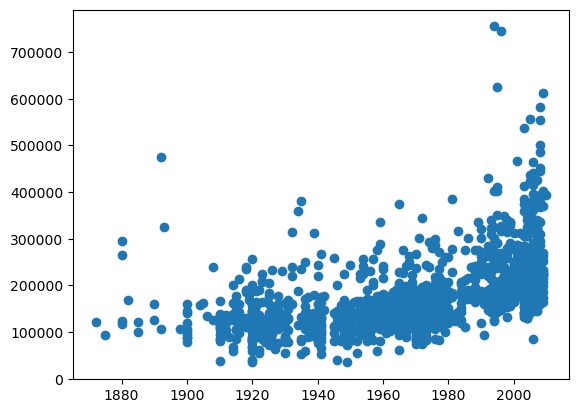

In [250]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)

In [255]:
train_df.query('YearBuilt < 1920 & SalePrice > 260000').index

Index([186, 305, 584, 748], dtype='int64', name='Id')

In [256]:
for x in train_df.query('YearBuilt < 1920 & SalePrice > 260000').index:
    to_drop.append(x)

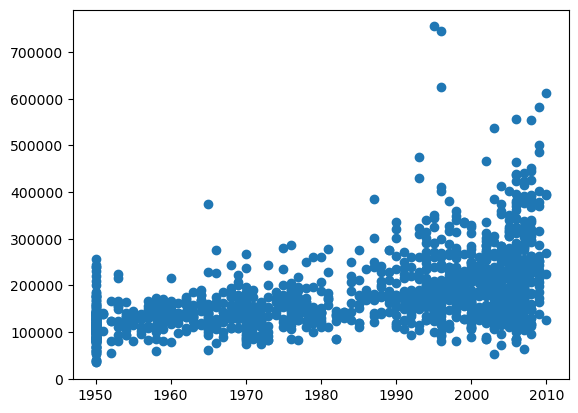

In [261]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)

In [263]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000 | YearRemodAdd < 2000 & SalePrice > 600000')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [264]:
for x in train_df.query('YearRemodAdd < 1970 & SalePrice > 300000 | YearRemodAdd < 2000 & SalePrice > 600000').index:
    to_drop.append(x)


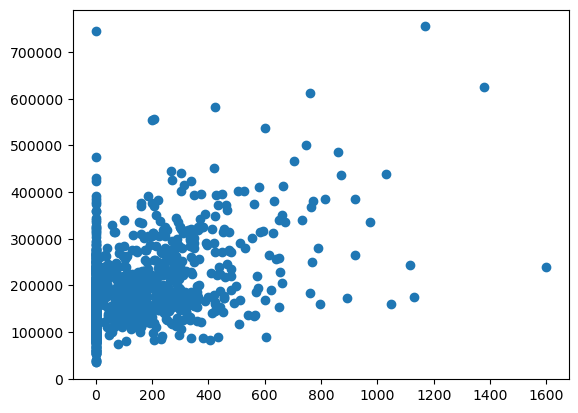

In [265]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

In [ ]:
train_df.query('MasVnrArea > 1300')

In [266]:
for x in train_df.query('MasVnrArea > 1300').index:
    to_drop.append(x)

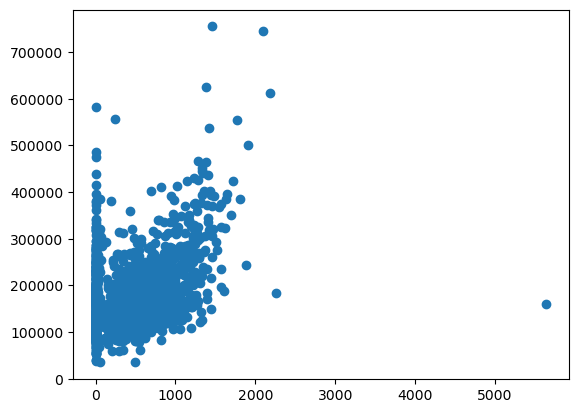

In [267]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)

In [269]:
train_df.query('BsmtFinSF1 > 5000')
to_drop.append(1299)

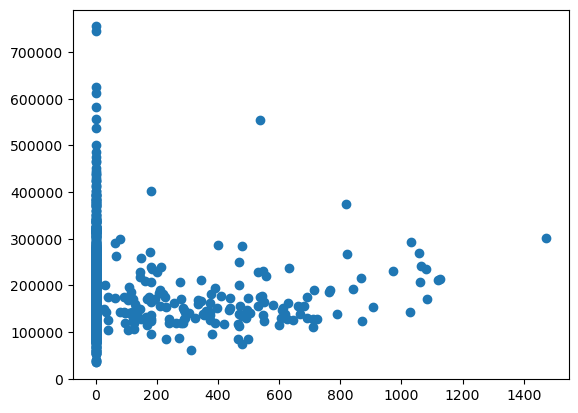

In [271]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_df)

In [ ]:
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64